In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../")

In [12]:
import utils.us_map
import utils.anomaly as anomaly
import utils.scores as scores
states = utils.us_map.main("../data/cb_2018_us_state_500k")

In [13]:
s1 = scores.SATScores("../data/sat/tabn226.40_17_18_19_20.xlsx")
s2 = scores.SATScores("../data/sat/tabn226.40_18_21_22_23.xlsx")
s2.df = s2.df.query("year!=2018")

sat_scores = scores.Scores()
sat_scores = sat_scores.merge(s1).merge(s2)
sat_scores.df.head()

,location,year,percent,section,mean,test
0,United States,2017,47.605306,total,1060,SAT
1,Alabama,2017,5.000000,total,1165,SAT
2,Alaska,2017,38.000000,total,1080,SAT
3,Arizona,2017,30.000000,total,1116,SAT
4,Arkansas,2017,3.000000,total,1208,SAT


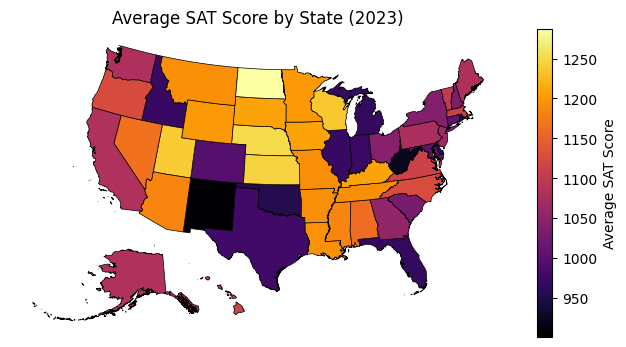

In [14]:
(states.merge(sat_scores.get_section("total").get_year(2023).df,
              left_on="NAME",
              right_on="location")
 .plot(column="mean",
       legend=True,
       cmap="inferno",
       edgecolor="black",
       figsize=(8, 8),
       lw=0.5,
       legend_kwds={"label": "Average SAT Score", "shrink": 0.5}))

plt.axis("off")
plt.title("Average SAT Score by State (2023)")
plt.show()

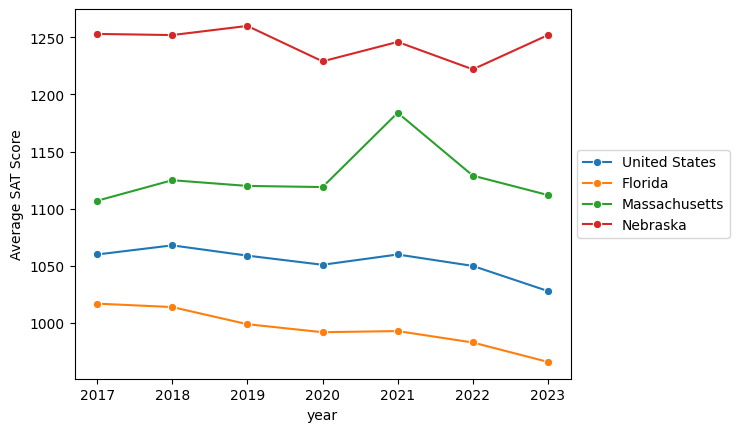

In [15]:
demonstration_locals = ["Nebraska",
                        "Massachusetts", "Florida", "United States"]

sat_scores.plot(demonstration_locals, section="total")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("Average SAT Score")
plt.xticks(range(sat_scores.df["year"].min(), sat_scores.df["year"].max()+1))
plt.show()

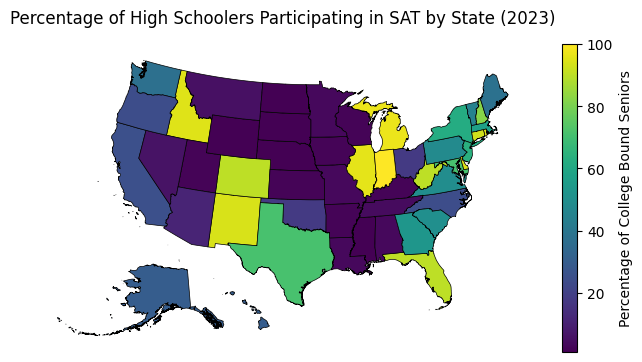

In [16]:
(states.merge(sat_scores.get_section("total").get_year(2023).df,
              left_on="NAME",
              right_on="location")
 .plot(column="percent",
       legend=True,
       edgecolor="black",
       figsize=(8, 8),
       lw=0.5,
       legend_kwds={"label": "Percentage of College Bound Seniors", "shrink": 0.5}))

plt.axis("off")
plt.title("Percentage of High Schoolers Participating in SAT by State (2023)")
plt.show()

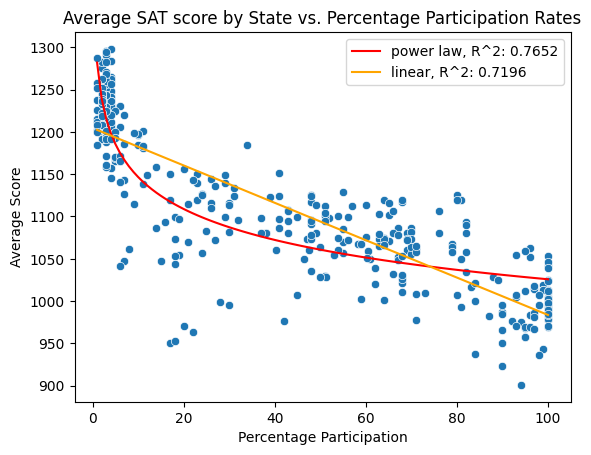

In [17]:
scores = sat_scores.get_section("total").df

anomaly.anomaly(scores, separate_years=False)
plt.title("Average SAT score by State vs. Percentage Participation Rates")

sat_corrected_scores = anomaly.anomaly(
    scores, separate_years=True, suppress=True)
plaw_scores = sat_corrected_scores.assign(
    anom_c=sat_corrected_scores["mean"]-sat_corrected_scores["plaw_pred"])

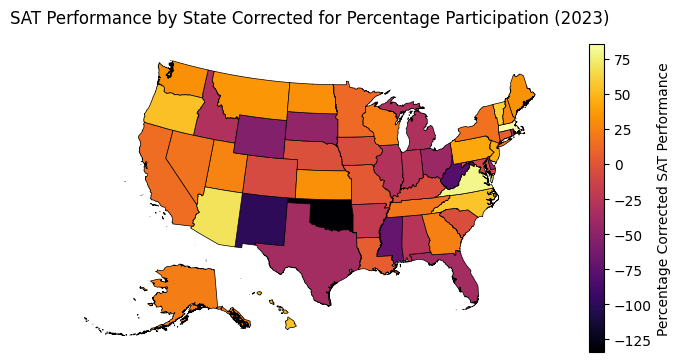

In [18]:
(states.merge(plaw_scores.query("year==2023"),
              left_on="NAME",
              right_on="location")
 .plot(column="anom_c",
       legend=True,
       cmap="inferno",
       edgecolor="black",
       figsize=(8, 8),
       lw=0.5,
       legend_kwds={"label": "Percentage Corrected SAT Performance", "shrink": 0.5}))

plt.axis("off")
plt.title("SAT Performance by State Corrected for Percentage Participation (2023)")
plt.show()

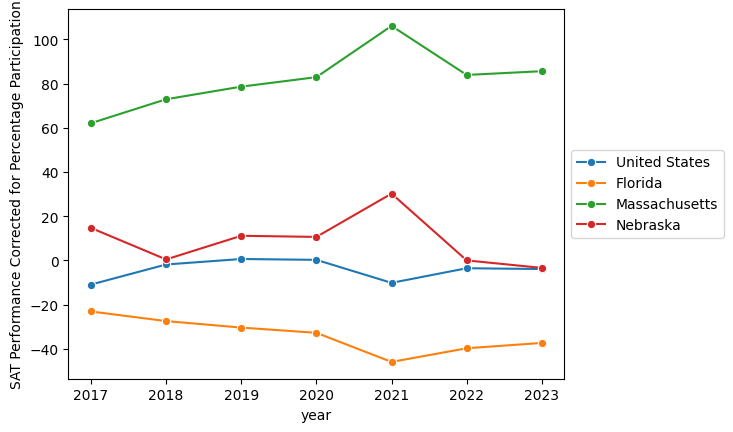

In [19]:
sns.lineplot(data=plaw_scores.query("location in @demonstration_locals"),
             x="year",
             y="anom_c",
             hue="location",
             marker="o")

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylabel("SAT Performance Corrected for Percentage Participation")
plt.xticks(range(sat_scores.df["year"].min(), sat_scores.df["year"].max()+1))
plt.show()

In [20]:
rankings = plaw_scores.pivot_table(index="location", columns="year", values="anom_c").sort_values(
    2023, ascending=False).reset_index()
rankings.columns.name = "2023 Rankings"
rankings.index = rankings.index + 1
rankings.round(1)

2023 Rankings,location,2017,2018,2019,2020,2021,2022,2023
1,Massachusetts,62.1,72.9,78.6,82.9,106.1,83.9,85.6
2,Virginia,48.5,55.8,67.5,69.2,81.6,72.2,78.8
3,Arizona,18.8,38.9,36.0,49.7,50.1,44.2,68.9
4,Vermont,56.0,55.4,52.8,54.6,54.6,43.2,60.4
5,North Carolina,11.7,21.6,31.7,33.4,54.0,55.2,55.4
6,Hawaii,22.2,26.9,35.1,35.6,53.7,50.2,54.2
7,Oregon,31.3,36.1,43.7,44.6,8.8,51.7,53.4
8,New Jersey,6.5,43.3,49.3,46.2,62.7,40.6,45.5
9,Pennsylvania,17.5,26.4,32.2,32.8,51.3,39.2,42.8
10,Montana,33.6,23.6,23.5,36.9,55.6,45.7,34.3


,location,year,percent,section,mean,test,lin_pred,plaw_pred
0,United States,2017,47.605306,total,1060,SAT,1106.840206,1070.928065
1,Alabama,2017,5.000000,total,1165,SAT,1204.540651,1205.521462
2,Alaska,2017,38.000000,total,1080,SAT,1128.866633,1083.682185
3,Arizona,2017,30.000000,total,1116,SAT,1147.211849,1097.223848
4,Arkansas,2017,3.000000,total,1208,SAT,1209.126956,1238.310733
...,...,...,...,...,...,...,...,...
203,Virginia,2023,49.000000,total,1113,SAT,1072.866587,1034.173581
204,Washington,2023,37.000000,total,1081,SAT,1103.040438,1048.744977
205,West Virginia,2023,90.000000,total,923,SAT,969.772593,1003.324616
206,Wisconsin,2023,2.000000,total,1236,SAT,1191.047506,1212.793461


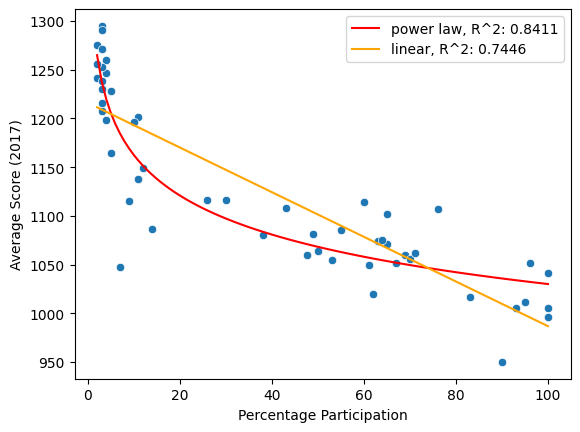

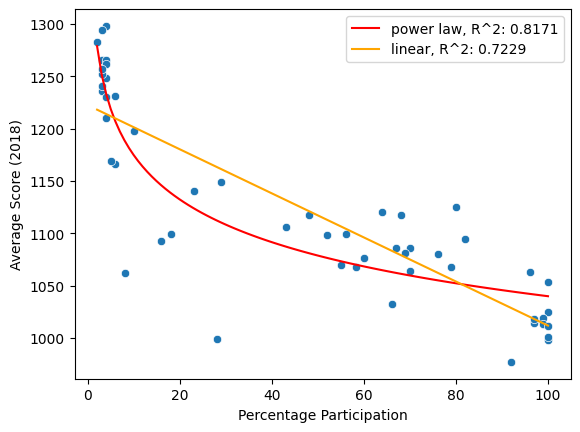

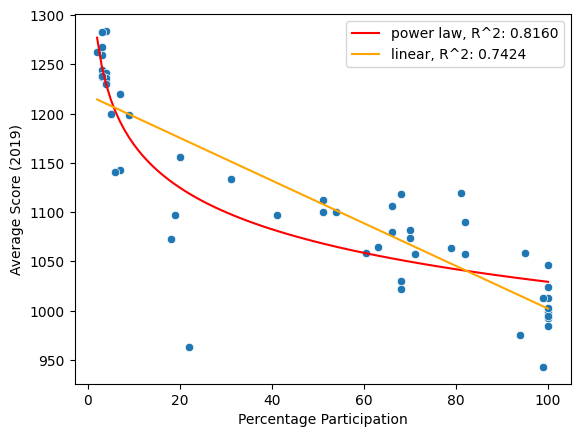

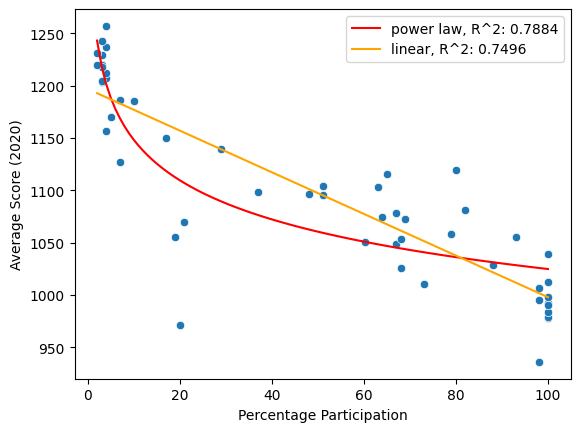

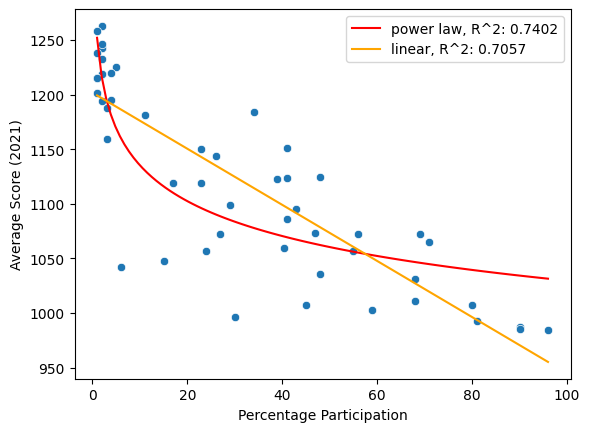

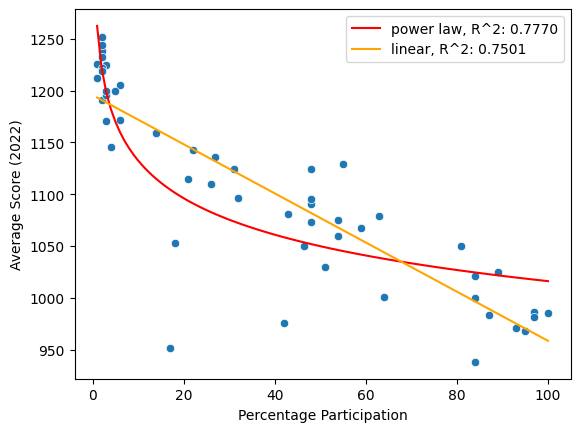

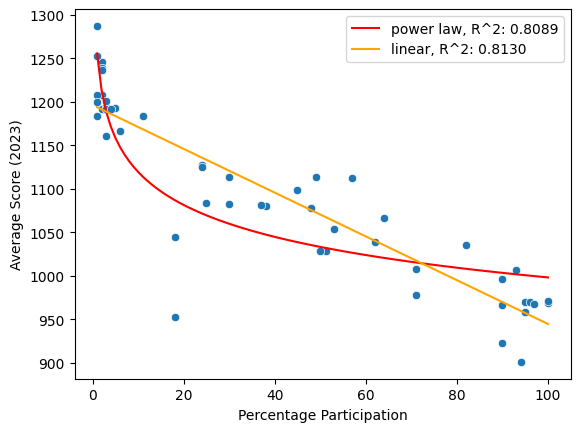

In [21]:
anomaly.anomaly(scores, separate_years=True)